# Iris - Classic Data Science Dataset

### data exploration and data visualization 

Justin Gosses - 2016-07-16

This is a brief exploration of a classic dataset of flower dimensions, specifically three types of iris. 

This worked is inspired by https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

Python version 3.5.1, Anaconda version 4.0.0
main python modules: matplotlib, pandas, warnings, seaborn, bokeh
 
Dataset comes from: https://www.kaggle.com/uciml/iris

Built within jupyter notebook: http://jupyter.org

license: MIT

In [6]:
# This Python 3 environment 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

#if running locally, run this so seaborn runs the graphs inline:
#sns.plt.show()   # run this one if you want to run every graph as separate window. 
%matplotlib inline

#import pandas, a data processing and CSV file I/O library
import pandas as pd

#also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

#loading the Iris flower dataset, which is in the "../input/" directory
#  note: don't use this is run local iris = pd.read_csv("../input/Iris.csv") # the iris dataset is now a Pandas DataFrame
iris = pd.read_csv("./input/Iris.csv") # the iris dataset is now a Pandas DataFrame



### making dataframes that only have one species of iris in them
iris_ve = iris.loc[iris['Species'] == "Iris-versicolor"]
iris_vi = iris.loc[iris['Species'] == "Iris-virginica"]
iris_s = iris.loc[iris['Species'] == "Iris-setosa"]

First output is a table of descriptive statistics. There is a "Species" column not shown. 

In [2]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

next 3 tables are the same but only for one species at time

In [102]:
iris_ve.describe()  # Iris-versicolor

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000       4.900000      2.000000       3.000000      1.000000
25%     63.25000       5.600000      2.525000       4.000000      1.200000
50%     75.50000       5.900000      2.800000       4.350000      1.300000
75%     87.75000       6.300000      3.000000       4.600000      1.500000
max    100.00000       7.000000      3.400000       5.100000      1.800000

In [103]:
iris_vi.describe()  # Iris-virginica

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000       50.00000     50.000000      50.000000      50.00000
mean   125.50000        6.58800      2.974000       5.552000       2.02600
std     14.57738        0.63588      0.322497       0.551895       0.27465
min    101.00000        4.90000      2.200000       4.500000       1.40000
25%    113.25000        6.22500      2.800000       5.100000       1.80000
50%    125.50000        6.50000      3.000000       5.550000       2.00000
75%    137.75000        6.90000      3.175000       5.875000       2.30000
max    150.00000        7.90000      3.800000       6.900000       2.50000

In [104]:
iris_s.describe()  # Iris-setosa

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

In [15]:
####  attempted to count how many species and number of sampels for each species
###   it appears there are 50 of each species, for 150 samples.
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

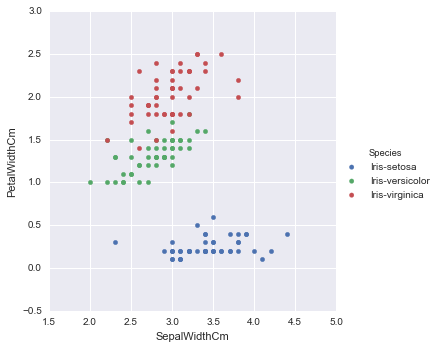

In [4]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalWidthCm", "PetalWidthCm") \
   .add_legend()

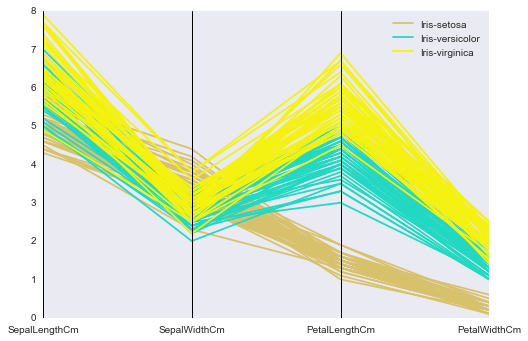

In [16]:
# Parallel comes from the pandas modules 
# coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

## Next few lines use bokeh

Bokeh is a python data visualization library. Depending on how this notebook is run the bokeh images may appear inline or open in separate windows. There are also lines that save the figures as entirely separate html files that get saved to the folder location this notebook is running from. 

In [24]:
from bokeh.plotting import figure, output_notebook, show
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

output_notebook()

Loading BokehJS ...

In [18]:
TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS)
p.scatter(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

In [19]:
show(p)

In [20]:
x = iris.SepalLengthCm
y = iris.SepalWidthCm
radii = 0.001
#Iris-virginica     50
#Iris-versicolor    50
#Iris-setosa        50
colormap = {'Iris-virginica': 'red', 'Iris-versicolor': 'green', 'Iris-setosa': 'blue'}
colors = [colormap[x] for x in iris['Species']]


output_notebook()

Loading BokehJS ...

In [21]:
TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS)
p.scatter(x,y, radius=0.09, fill_color=colors, fill_alpha=0.5, line_color=None)

In [22]:
show(p)

In [89]:
x = iris.PetalLengthCm
y = iris.SepalWidthCm
radii = 0.001
#Iris-virginica     50
#Iris-versicolor    50
#Iris-setosa        50
colormap = {'Iris-virginica': 'red', 'Iris-versicolor': 'green', 'Iris-setosa': 'blue'}
colors = [colormap[x] for x in iris['Species']]


output_notebook()

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS)
p.scatter(x,y, radius=0.09, fill_color=colors, fill_alpha=0.5, line_color=None)

output_file("scatter1.html")

show(p)

Loading BokehJS ...

In [13]:
from bokeh.charts import Histogram

hist = Histogram(iris, values="PetalLengthCm", color="Species", legend="top_right", bins=12)

show(hist)

In [14]:
from bokeh.charts import Bar, output_file, show
from bokeh.sampledata.autompg import autompg as df

p = Bar(df, label='yr', values='mpg', agg='median', group='origin',
        title="Median MPG by YR, grouped by ORIGIN", legend='top_right')

output_file("bar1.html")

show(p)

In [87]:
from bokeh.charts import Bar, output_file, show
#from bokeh.sampledata.autompg import autompg as df

p = Bar(iris, label='PetalLengthCm', values='PetalWidthCm', agg='median', group='Species',
        title="Median PetalWidthCm by PetalLengthCm, grouped by Species", legend='top_right')

output_file("bar2.html")

show(p)

### Back to the Seaborn data visualization library

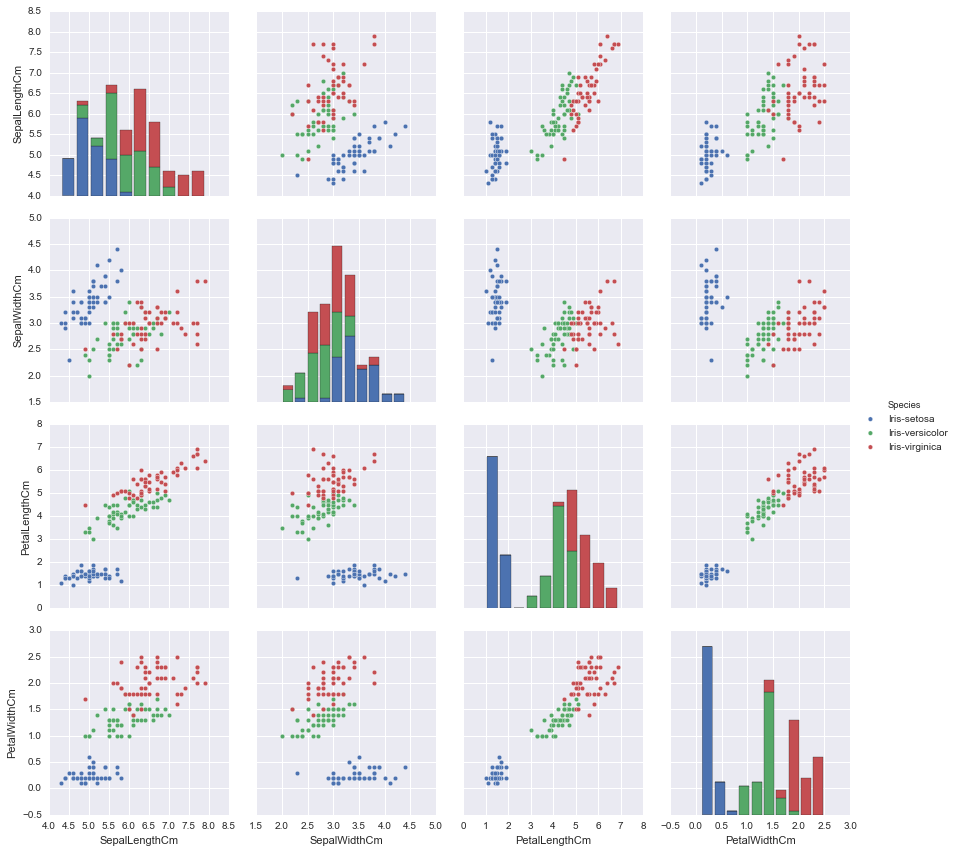

In [99]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

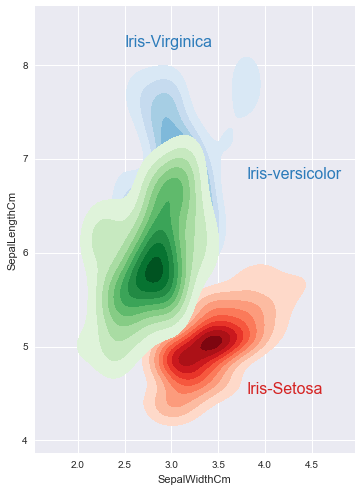

In [100]:
### adding to the previous plot by using kde plot fo colorize gradients by species. 

sns.set(style="darkgrid")


# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

#### this are the df subsets of iris :  iris_s, iris_vi, iris_ve

#### Draw the two density plots
ax = sns.kdeplot(iris_s.SepalWidthCm, iris_s.SepalLengthCm,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(iris_vi.SepalWidthCm, iris_vi.SepalLengthCm,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(iris_ve.SepalWidthCm, iris_ve.SepalLengthCm,
                 cmap="Greens", shade=True, shade_lowest=False)

#### Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Iris-Virginica", size=16, color=blue)
ax.text(3.8, 4.5, "Iris-Setosa", size=16, color=red)
ax.text(3.8, 6.8, "Iris-versicolor", size=16, color=green)

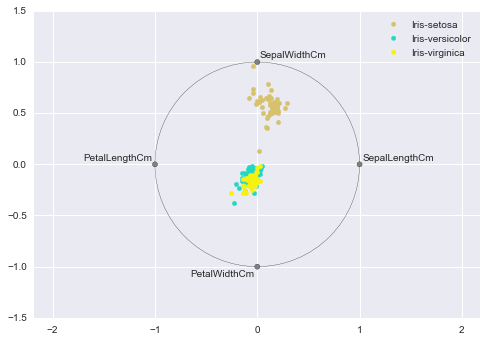

In [101]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

In [106]:
pip freeze > requirements.txt

SyntaxError: invalid syntax (<ipython-input-106-59d01b4c25db>, line 1)

In [107]:
pip freeze > stable-req.txt

SyntaxError: invalid syntax (<ipython-input-107-71d20aee1570>, line 1)